# Optimization
## Agenda
1. Overview
2. Types Of Optimization Problems
3. Techniques For Solving Them

## 1. Overview
Optimization is a field of applied mathematics. In a nutshell, when optimization seeks to find the "optimal" inputs to a given problem. As we will see, there are several types of optimization problems. Additionally, based on the circomstances, there are several categories of techniques that can be applied.

In this notebook we will examine the different types of optimization problems as well as the techniques for addressing them.

# 2. Types Of Optimization Problems

Classically, the optimzation problems in any introductory course fall into two categories:
1. Maximization - finding a local or absolute maximum
2. Mimimization - finding a local or absolute minimum

These problems are basically two sides of the same coin. A simple transformation can render an maximization as a minimization: simply render the equation such that $$g(x) = \frac{1}{f(x)}$$

As we will see, it not always the case that a local maxima/minima exists in the real world. As a result we will look at additional problems which deal with asymtotal functions which have no maxima/minima but instead have an asymtote. We will refer to these types of problems as:

3. Asymtotal Optimization - finding a point that can reasonably be treated like a maxima/minima


## 2.1. Maximization

## 2.2. Minimization

## 2.3. Asymptotic Optimization
While the classical problems covered section in 2.1 and 2.2 do occur in nature, they are not the only pattern we will see. In some cases, we are not presented a hyperbolic curve (or atleast a curve with a local extrema) but instead are presented with a curve that is asymtotic.

As an example, consider a problem where we want to find the optimal amount of investment. We look at the cost/benefit curve and see that it is asymtotic. We would need a method for defining and identifying that optimal point.

# 3. Optimization Techniques

Besides lookingf at the types of problems they address, optimization techniques can be classified broadly based on the way they work. At the highest level we have:
1. **Analytical Methods** - Rely on solving a system of equations to find an exact result
2. **Numerical Methods** - Rely on brute force trial and error to approximate the correct result

In the table below we try to relate the categories of problem and technique to the individual method. We dive deeper into these methods later in this section.

<table>
    <tr>
        <th>Optimization Problems<br>Optimization techniques
        </th>
        <th>Maxima</th>
        <th>Minima</th>
        <th>Asymtote</th>
    </tr>
    <tr>
        <td>Numerical</td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>Analytical</td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
</table>

## 3.1. Analytical Optimization Techniques

## 3.2. Numerical Optimization Techniques

Unlinke analytical methods which find the exact right answer, the numerical methods are those which apply an iterative, trial and error, approach to finding an approximation. At a high level, most of these solutions require a discrete (or discretized) search space with the use specifying a threshold for "what is close enough to stop looking".

Broadly speaking numerical methods can be further subdivided based on how they work:
- **Grid Search** - Sequentially search the entire search space until the extrema is found.
- **Random Search** - Pseudo-randomly search the space until the extrema is found
- **Model Based Search** - Randomly search a probability distribution that self calibrates during the search

Visual representations of these search methods can be seen below:

<table>
    <tr>
        <th>Grid Search</th>
        <th>Random Search</th>
        <th>Model Based Search</th>
    </tr>
    <tr>
        <td><img src='images/grid_search.gif' width="400px" height="400px" /></td>
        <td><img src='images/random_search.gif' width="400px" height="400px" /></td>
        <td><img src='images/bayesian_search.gif' width="400px" height="400px" /></td>
    </tr>
</table>




A smooth function can be optimized in a few ways
- first-order method: gradient descent, SGD, etc.
- second-order method: Newton’s method, L-BFGS, etc
https://www.cs.uic.edu/~hjin/files/bayesian_opt.pdf

### 3.2.2. Random Search

- quasi-random sampling
- Latin hypercube sampling

### 3.2.3. Sequential Model-Based Optimization (SMBO)
SMBO methods sequentially construct models to approximate the performance of hyperparameters based on historical measurements, and then subsequently choose new hyperparameters to test based on this model.

SMBO iterates between fitting models and using them to make choices about which configurations to investigate. It offers the appealing prospects of interpolating performance between observed parameter settings and of extrapolating to previously unseen regions of parameter space. It can also be used to quantify importance of each parameter and parameter interactions. 

Stated another way, in the context of machine learning, we are usign machine learning to calibrate the search algorithm to efficiently yield hyperparameters for our machine learning algorithm.

In my research I have come accross the following SMBO algorithms:
- [Random Online Adaptive Racing (ROAR)](https://www.cs.ubc.ca/~hutter/papers/10-TR-SMAC.pdf)
- [Sequential Model-based Algorithm Configuration (SMAC)](https://www.cs.ubc.ca/~hutter/papers/10-TR-SMAC.pdf)

Probabilistic Regression Models
- Gaussian Process (GP)
- Random Forests
- Tree-structured Parzen Estimator (TPE)

With hyperparameter optimization we aim to identify a set of hyperparameters $x*$ which yield the minimal/maximal value of a unction $f(x)$.

$$ x^* = argmin \ f(x)$$ 

It may be expensive to exhaustively search for $x^*$ and the hyperparameter gradients may not exist preventing us from using methods like gradient descent.

We can randomly sample but this may not be accurate. So we may choose to model the function.

#### Gaussian Process (GP)

The gaussian proccess assume that values within a search space will be most similar bewteen neighboring points.

Assume we have a variable or function which depends on a set of parameters:

$$ y = f(X) $$

Assume variable or function is being modeled as a gaussian process:

$$ \hat y \sim \mathcal{N}(\mu, \sigma^2) $$

We normalize our $x$ and $y$ data which means that $\mu=0$

We can express our $\sigma^2$ as the value of a kernel function $k$ which considers the parameter set

$$ \sigma^2 = k(X) $$

**Note:** There are a number of different kernels to choose from.





The prediction of the value of the function $\hat f$ also follow the normal distribution:

$$ f^* \sim \mathcal{N}(\hat \mu, \hat \sigma )$$

As we iterate and sample the optimization funcion we look at historical values to calibrate our distribution

<center><img src='images/gaussian_process_predictions.jpg' height='400px' width='400px' ></center>

We do this until we hit a termination condition (threshold of accuracy, maximum number of iterations, time limit reached).

https://maelfabien.github.io/machinelearning/HyperOpt/#gaussian-process-gp

SyntaxError: keyword can't be an expression (<ipython-input-2-e4f977bd523a>, line 2)

#### Random Forests

A Random Forest is an ensemble of regression trees. We use a regression to model $f$. Like the gaussian process we assume $ f^* \sim \mathcal{N}(\hat \mu, \hat \sigma )$. Again $\mu$ and $\sigma$ are recalibrated with each iteration.

not sure how this is different...???

This is used by Sequential Model-based Algorithm Configuration library (SMAC). https://maelfabien.github.io/machinelearning/HyperOpt/#gaussian-process-gp




#### Bayesian Optimization

See mayesian notebook



#### Tree-structured Parzen Estimator (TPE)

The TPE approach models $P(x|y)$ and $P(y)$ where x represents hyperparameters and $y$ the associated quality score. $P(x|y)$ is modeled by transforming the generative process of hyperparameters, replacing the distributions of the configuration prior with non-parametric densities.

https://optunity.readthedocs.io/en/latest/user/solvers/TPE.html

Unlike gaussian process it does not assume a predictive distribution. Instead it creates two hierarchical processes $l(x)$ and $g(x)$. These functions model the paramers $x$ of f as a disjoint pair values partitioned as a specified point $\dot y$

$$x* = \begin{cases}
l(x) & when \ 
g(x) & when \ 
\end{cases}$$



## 3.3 Asymptotic Optimization Techniques

### 3.3.1. The Elbow Method
The elbow method is a heuristic approach (imperfect approximation) applied to optimizations of asymtotic functions. The method traced back to Robert Thorndike's 1953 publication. It was larely an inituitive method where the user visually identifies rather than quantitatively. Since then there have been formal definitions for the Elbow method.

#### 3.3.1.1 The Kneedle Algorithm
The [kneedle algorithm](https://raghavan.usc.edu/papers/kneedle-simplex11.pdf) is relatively new being published in 2011. 

The algorithm is an intuitive numerical method that relies on the definition of **curvature**. Curvature quantifies the difference between an arbitrary function and a straight line. Curvature is defined as follows in a closed form solution:

$$ K_f(x) = \frac{f^{''}(x)}{(1+f^{'}(x)^2)^{1.5}} $$

For more information on curvature, see the [wikipedia article](https://en.wikipedia.org/wiki/Curvature).

In Figure 2 below, we see how the algorithm works.

<img src="./Kneedle Algorithm.png" style="width:800px">

Fig. 2: Kneedle algorithm for online knee detection. (a) depicts the smoothed and normalized data, with dashed bars indicating the
perpendicular distance from y = x with the maximum distance indicated. (b) shows the same data, but this time the dashed bars are
rotated 45 degrees. The magnitude of these bars correspond to the difference values used in Kneedle. (c) shows the plot of these difference
values and the corresponding threshold values (with S = 1). The knee is found at x = 0.22 and is detected after receiving the point x = 0.55

#### 3.1.1.2. Implimentations Of The Kneedle Algorithm
Luckily, there is a python implimentation of this method available in the [kneed library](https://github.com/arvkevi/kneed).

The library's functionality relies on the user specifying two pieces of data: the corve type and the direction of the curve. The documentation provides the following diagram to assist:
<img src="./Curve Types And Directions.png" style="width:800px">



Here is an example using the code:

Our knee point is: <4,3>


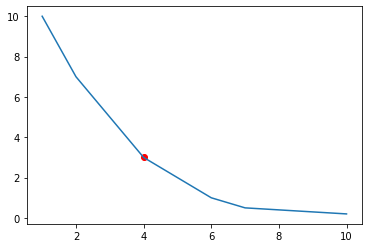

In [33]:
# Generate some test data
x = [1,  2, 3, 4, 5, 6, 7,   8,   9,   10]
y = [10, 7, 5, 3, 2, 1, 0.5, 0.4, 0.3, 0.2]

# Calculate the knee point
import kneed
kneedle = kneed.KneeLocator(x, y, S=1.0, curve="convex", direction="decreasing")
knee_point_x = int(kneedle.knee)
knee_point_y = y[knee_point_x - 1]
print("Our knee point is: <{0},{1}>".format(knee_point_x, knee_point_y))

# Plot the information
from matplotlib import pyplot
fig, ax = pyplot.subplots()
pyplot.plot(x, y)
pyplot.scatter(knee_point_x, knee_point_y, c='red');

### 3.3.2. Inflection Point Of Acceleration
Velocity is a rate of change in position for a given object. It has a scalar indicating magnitude and a sign indicating direction. If the velocity is positive it means the object is moving in a particular direction (up, down, forward, etc.). If the velocity changes sign (eg. from positive to negative) it indicates that the object has changed direction.

Acceleration is a rate of change in velocity. It is a rate of change of a rate of change. A positive acceleration indicates that the velocity (rate of change in position) has increased. A negative acceleration indicates that the velocity has decreased.

| V | A | Description |
--- | --- | ---
| + | + | Speeding up |
| + | - | Slowing down |
| - | - | Speeding up |
| - | + | Slowing Down |

If we see a sign change in accelleration it means that we have gone from speeding up to slowing down or vice versa. It is indicitive of a course correction because at some point the acceleration was zero. This is an inflection point of acceleration.



In [123]:
# Generate some test data
x = [1,  2, 3, 4, 5, 6, 7,   8,   9,   10]
y = [10, 7, 5, 3, 2, 1, 0.5, 0.4, 0.3, 0.2]

# Define some helpful functions
def same_sign(a, b):
    if a >= 0:
        if b >= 0:
            return True
        else:
            return False
    else:
        if b >= 0:
            return True
        else:
            return False
    
def is_ip(col):
    a = col.iloc[0]
    b = col.iloc[1]
    return not same_sign(a, b)

def description(cols):
    a = cols.iloc[0]
    b = cols.iloc[1]
    if same_sign(a, b):
        return 'Slowing down'
    else:
        return 'Speeding Up'
        

# Make some additional calculations
import pandas
df = pandas.DataFrame({"x": x, "y": y})
df["v"] = df["y"].diff()
df["a"] = df["v"].diff()
df["d"] = df[["v", "a"]].apply(lambda col: description(col), axis=1)
df["ip"] = df["a"].rolling(2, center=True).apply(lambda col: is_ip(col))
df

,x,y,v,a,d,ip
0,1,10.0,NaN,NaN,Speeding Up,NaN
1,2,7.0,-3.0,NaN,Speeding Up,NaN
2,3,5.0,-2.0,1.000000e+00,Slowing down,NaN
3,4,3.0,-2.0,0.000000e+00,Slowing down,0.0
4,5,2.0,-1.0,1.000000e+00,Slowing down,0.0
5,6,1.0,-1.0,0.000000e+00,Slowing down,0.0
6,7,0.5,-0.5,5.000000e-01,Slowing down,0.0
7,8,0.4,-0.1,4.000000e-01,Slowing down,0.0
8,9,0.3,-0.1,-5.551115e-17,Speeding Up,1.0
9,10,0.2,-0.1,5.551115e-17,Slowing down,0.0


We can see that the acceleration was decreasing all the way down the curve (moving left to right on the x-axis) until we hit zero. We can see this is a much more aggressive selection that the Kneedle algorithm produced (green).

Our knee point is: <8,0.4>


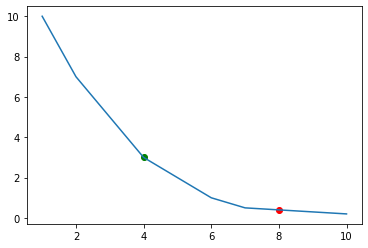

In [124]:
# Calculate the knee point
i = df[df["ip"] == 1].index[0] - 1
knee_point_x = df.loc[i, "x"]
knee_point_y = df.loc[i, "y"]
print("Our knee point is: <{0},{1}>".format(knee_point_x, knee_point_y))

# Plot the information
from matplotlib import pyplot
fig, ax = pyplot.subplots()
pyplot.plot(x, y)
pyplot.scatter(knee_point_x, knee_point_y, c='red');
pyplot.scatter(4, 3, c='green');

### 3.3.3. Marginal Threshold

We may decide that certain increments are just not worth the marginal gain. We can set a threshold to act as a cutoff point.

In [126]:
# Generate some test data
x = [1,  2, 3, 4, 5, 6, 7,   8,   9,   10]
y = [10, 7, 5, 3, 2, 1, 0.5, 0.4, 0.3, 0.2]
       

# Make some additional calculations
import pandas
import numpy
df = pandas.DataFrame({"x": x, "y": y})
df["d"] = abs(df["y"].diff())
df["t"] = df["d"] <= 0.1
df

,x,y,d,t
0,1,10.0,NaN,False
1,2,7.0,3.0,False
2,3,5.0,2.0,False
3,4,3.0,2.0,False
4,5,2.0,1.0,False
5,6,1.0,1.0,False
6,7,0.5,0.5,False
7,8,0.4,0.1,True
8,9,0.3,0.1,False
9,10,0.2,0.1,True


Our knee point is: <7,0.5>


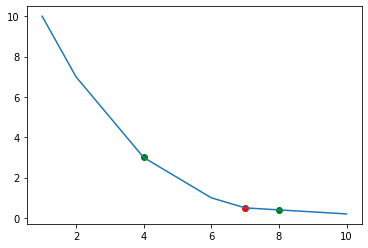

In [127]:
# Calculate the knee point
i = df[df["t"] == 1]["x"].index[0] - 1
knee_point_x = df.loc[i, "x"]
knee_point_y = df.loc[i, "y"]
print("Our knee point is: <{0},{1}>".format(knee_point_x, knee_point_y))

# Plot the information
from matplotlib import pyplot
fig, ax = pyplot.subplots()
pyplot.plot(x, y)
pyplot.scatter(knee_point_x, knee_point_y, c='red');
pyplot.scatter(4, 3, c='green');
pyplot.scatter(8, 0.4, c='green');